In [1]:
import os
import sys
import time
import shutil
import logging
import argparse
import yaml
import traceback

import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
pwd

'/atlas/u/kechoi/multi-fairgen/notebooks'

In [3]:
cd ../

/atlas/u/kechoi/multi-fairgen


# Ratios

In [21]:
len(ratios)

19737

In [22]:
len(y)

20000

In [23]:
data = np.load('classifier/mnist_results/ratios.npz')
ratios = data['ratios']
new_ratios = data['ratios'][ratios != np.inf]
y = data['d_labels'][ratios != np.inf]

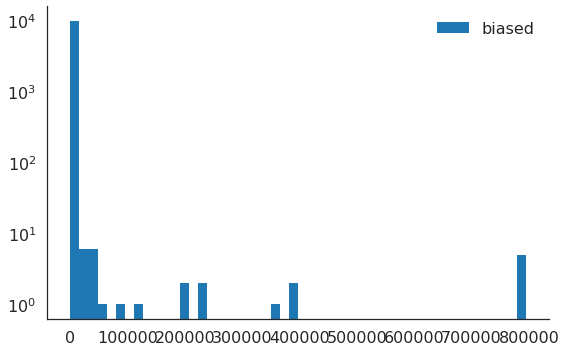

In [29]:
plt.figure(figsize=(8,5))
_ = plt.hist(new_ratios[y==0], bins=50, log=True ,label='biased')
# _ = plt.hist(new_ratios[y==1], bins=50, log=True, label='ref', alpha=0.5)

plt.legend()
sns.despine()
plt.tight_layout()

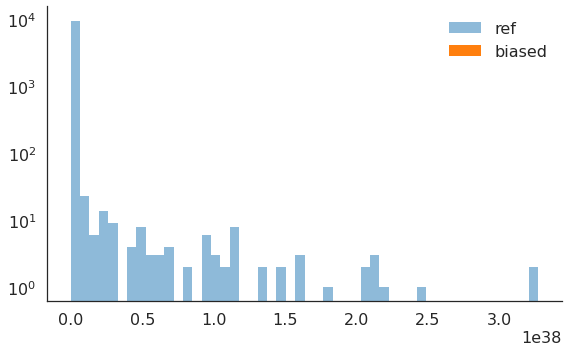

In [34]:
plt.figure(figsize=(8,5))
# _ = plt.hist(new_ratios[y==0], bins=50, log=True ,label='biased')
_ = plt.hist(sorted(new_ratios[y==1]), bins=50, log=True, label='ref', alpha=0.5)
_ = plt.hist(sorted(new_ratios[y==0]), bins=50, log=True ,label='biased')

plt.legend()
sns.despine()
plt.tight_layout()

In [26]:
new_ratios[y==0]

array([9.0484589e-02, 1.1769342e-10, 3.9876916e-16, ..., 7.3712972e-06,
       1.8436954e-03, 3.6535785e-05], dtype=float32)

In [27]:
new_ratios[y==1]

array([3.3495802e+10, 1.7065230e+22, 1.9900719e+10, ..., 3.4515764e+16,
       6.9763879e+22, 8.5085840e+12], dtype=float32)